### Libraries

All the required code is implemented in `grn.py` (manipulation of a gene regulatory network, GRN) and `simulator.py` (running the simulations of a constructed network).

In [1]:
import simulator, grn
import numpy as np

### Constructing the network
Construction of the network is relatively straightforward. First, we need to call a constructor:

In [2]:
my_grn = grn.grn()

In the next step, we can add different species. Input species do not degrade, while for all other (ordinary) species degradation rate needs to be specified.

In [3]:

# input species
my_grn.add_input_species("X1")
my_grn.add_input_species("X2")

# other species
my_grn.add_species("Y", 0.1)


In the next step we can add a gene, which will be defined by a set of regulators and a set of products. 

The first gene will describe the function `not X1 and X2`

In [4]:

# regulators of a gene
regulators = [{'name': 'X1', 'type': -1, 'Kd': 5, 'n': 2},
                {'name': 'X2', 'type': 1, 'Kd': 5, 'n': 3}]
# products of a gene
products = [{'name': 'Y'}]

# adding a gene to the network - the first parameter specifies the rate of gene expression
my_grn.add_gene(10, regulators, products)

Similarly, we can add another gene. The second gene will describe the function `X1 and not X2`. Since both genes will produce the same output (`Y`) the network will implement `Y = (not X1 and X2) OR (X1 and not X2) = X1 XOR X2`.

In [5]:
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'X2', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'Y'}]
my_grn.add_gene(10, regulators, products)

We can check which genes are in the network:

In [6]:
my_grn.genes

[{'alpha': 10,
  'regulators': [{'name': 'X1', 'type': -1, 'Kd': 5, 'n': 2},
   {'name': 'X2', 'type': 1, 'Kd': 5, 'n': 3}],
  'products': [{'name': 'Y'}],
  'logic_type': 'and'},
 {'alpha': 10,
  'regulators': [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
   {'name': 'X2', 'type': -1, 'Kd': 5, 'n': 3}],
  'products': [{'name': 'Y'}],
  'logic_type': 'and'}]

Or plot the network

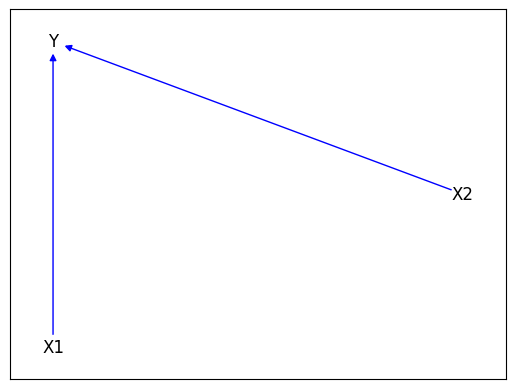

In [7]:
my_grn.plot_network()

And run some simulations

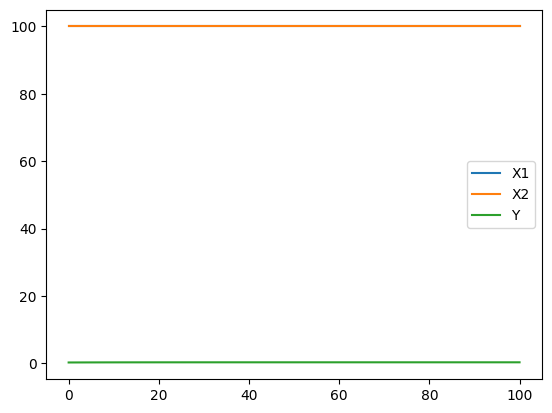

In [7]:
# specify inputs

IN = np.zeros(len(my_grn.input_species_names))
IN[0]=100
IN[1]=100

#print(my_grn.genes)

IN = np.zeros(len(my_grn.input_species_names))
IN[0]=100
IN[1]=100

T, Y = simulator.simulate_single(my_grn, IN)

The simulations can also be performed for a sequence of inputs.

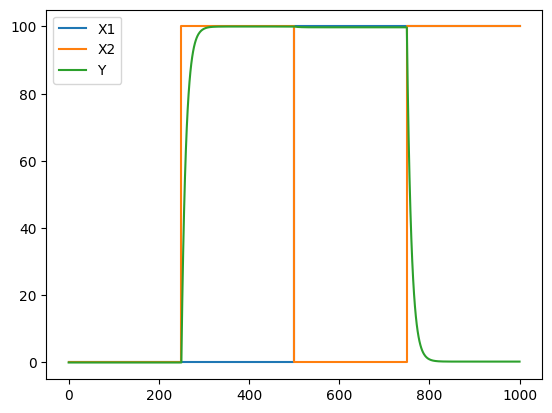

In [8]:
T, Y = simulator.simulate_sequence(my_grn, [(0,0), (0,100), (100,0), (100,100)], t_single = 250)

In [16]:
my_grn.species_names

['X1', 'X2', 'Y']

In [33]:
activators = {s:[] for s in my_grn.species_names}
inhibitors = {s:[] for s in my_grn.species_names}


for gene in my_grn.genes:
    for product in gene['products']:
        activators[product['name']].extend([x['name'] for x in gene['regulators'] if x['type'] == 1])
        inhibitors[product['name']].extend([x['name'] for x in gene['regulators'] if x['type'] == -1])



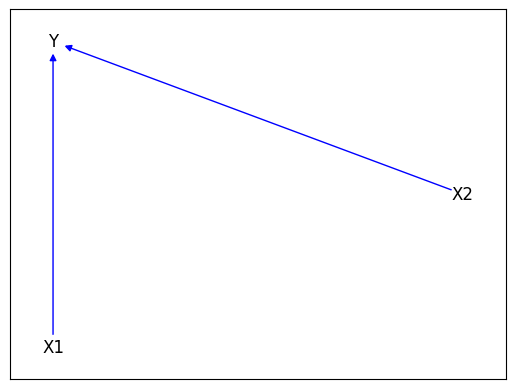

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [] 
cols = []

for prod in activators:
    for reg in activators[prod]:
        edges.append((reg, prod))
        cols.append('b')

for prod in inhibitors:
    for reg in inhibitors[prod]:
        edges.append((reg, prod))
        cols.append('r')

G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw_networkx(G, pos=nx.circular_layout(G), arrows=True, node_color = 'w', edge_color=cols)
plt.show()

